# Cluster Results
### Multiple runs

In this notebook we show the results of the cluster estimations for different Copacabana runs.

### Importing Packages

In [100]:
from astropy.table import Table, vstack
from astropy.io.fits import getdata

import pandas as pd

import matplotlib
import numpy as np

from collections import defaultdict
from matplotlib import pylab
import matplotlib.pyplot as plt

from scipy import stats
import sklearn

import scipy.stats as st

In [101]:
import seaborn as sns

### Loading Data

In [102]:
# ## the run we take a look into is:
# pz_labels = ['gauss001','gauss003','gauss005',None,'dnf_model']
# runs= ['%s-rhod-m0'%li for li in pz_labels[:-2]]
# runs+= ['dnf-rhod-m0','dnf003-rhod-m0']
# #runs= [run1,run2,run3,run4]

In [162]:
runs = ['gauss001-rhod','gauss001-r200','gauss001-rhod-m0','gauss001-r200-m0']

In [163]:
vc = viewClusters()
for run in runs:
    print('run: %s'%run)
    vc.load_data(run)

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00000.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00016.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00017.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00018.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00019.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00020.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00022.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00032.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00033.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:311: RuntimeWarning: divide by zero encountered in log10


run: gauss001-r200
run: gauss001-rhod-m0
run: gauss001-r200-m0


### Residuals and Metrics

In [164]:
for run in runs:
    vc.compute_residuals(run)

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:311: RuntimeWarning: divide by zero encountered in log10


In [165]:
for run in runs:
    vc.eval_all_metrics(run)

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:311: RuntimeWarning: divide by zero encountered in log10


In [166]:
heading_properties = [('font-size', '16px')]
cell_properties = [('font-size', '16px')]
dfstyle = [dict(selector="th", props=heading_properties),\
 dict(selector="td", props=cell_properties)]

#df.style.set_table_styles(dfstyle)

### Summary Statistics for the whole sample

Here we compute some statiscial properties of the ratio $= x/x_{true}$ where x ={$N_{gals},\mu_{\star},R_{200}$}

In [167]:
stats_all = vc.show_metrics_table_all(runs[0])
print('Statistics for the whole sample')
stats_all.style.set_table_styles(dfstyle)

Statistics for the whole sample


,bias,outlier_frac,scatter_nmad,scatter_percentile,scatter_stdev
Ngals,0.0496198,0.047671,0.24797,0.311632,0.373322
MU,-0.00926374,0.0822416,0.152587,0.215257,0.295387
R200,-0.195805,0.000727802,0.290815,0.321926,0.377397


In [168]:
stats_all = pd.concat([vc.show_metrics_table_all(run) for run in runs])
stats_all['run'] = np.repeat(runs,3)
stats_all = stats_all.sort_index()
stats_all['predictor'] = stats_all.index
stats_all = stats_all.set_index('run')

In [169]:
#stats_all

In [170]:
stats_all.iloc[np.where(stats_all.predictor=='MU')[0],[0,2,3]].style.set_table_styles(dfstyle)

,bias,scatter_nmad,scatter_percentile
run,,,
gauss001-rhod,-0.00926374,0.152587,0.215257
gauss001-r200,0.0149162,0.204249,0.252957
gauss001-rhod-m0,-0.0685944,0.18966,0.242893
gauss001-r200-m0,-0.0791362,0.243341,0.300445


In [171]:
stats_all.iloc[np.where(stats_all.predictor=='Ngals')[0],[0,2,3]].style.set_table_styles(dfstyle)

,bias,scatter_nmad,scatter_percentile
run,,,
gauss001-rhod,0.0496198,0.24797,0.311632
gauss001-r200,0.0760898,0.279197,0.340005
gauss001-rhod-m0,-0.0476204,0.28249,0.346134
gauss001-r200-m0,-0.0535898,0.33508,0.407482


In [172]:
stats_all.iloc[np.where(stats_all.predictor=='R200')[0],[0,2,3]].style.set_table_styles(dfstyle)

,bias,scatter_nmad,scatter_percentile
run,,,
gauss001-rhod,-0.195805,0.290815,0.321926
gauss001-r200,-7.15256e-07,2.5034e-07,2.68221e-07
gauss001-rhod-m0,-0.145562,0.270339,0.306293
gauss001-r200-m0,-7.15256e-07,2.5034e-07,2.68221e-07


### Residuals Distribution

Residuals

In [173]:
df = get_dataFrame_residual(vc,runs)

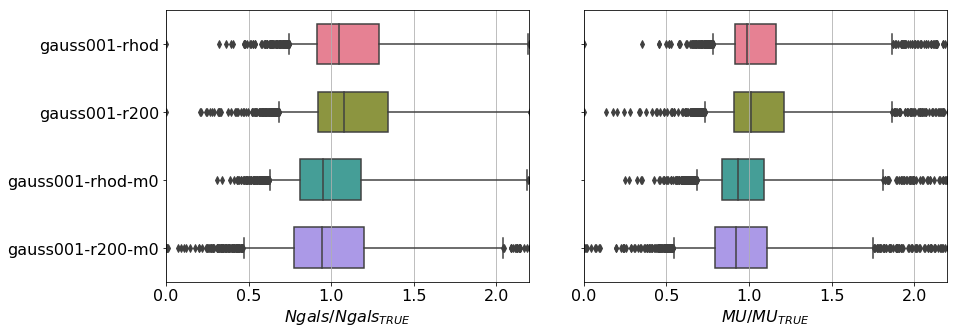

In [174]:
fig, axs = plt.subplots(1, 2, sharey='all', figsize=(14,5))
fig.subplots_adjust(hspace=0.25,wspace=0.15)

box_plot(df,'Ngals',ax=axs[0],xlims=(0.,2.2))
box_plot(df,'MU',ax=axs[1],xlims=(0.,2.2))

In [175]:
nruns=4

In [176]:
axs.shape

(2,)

(0.0, 2.3)

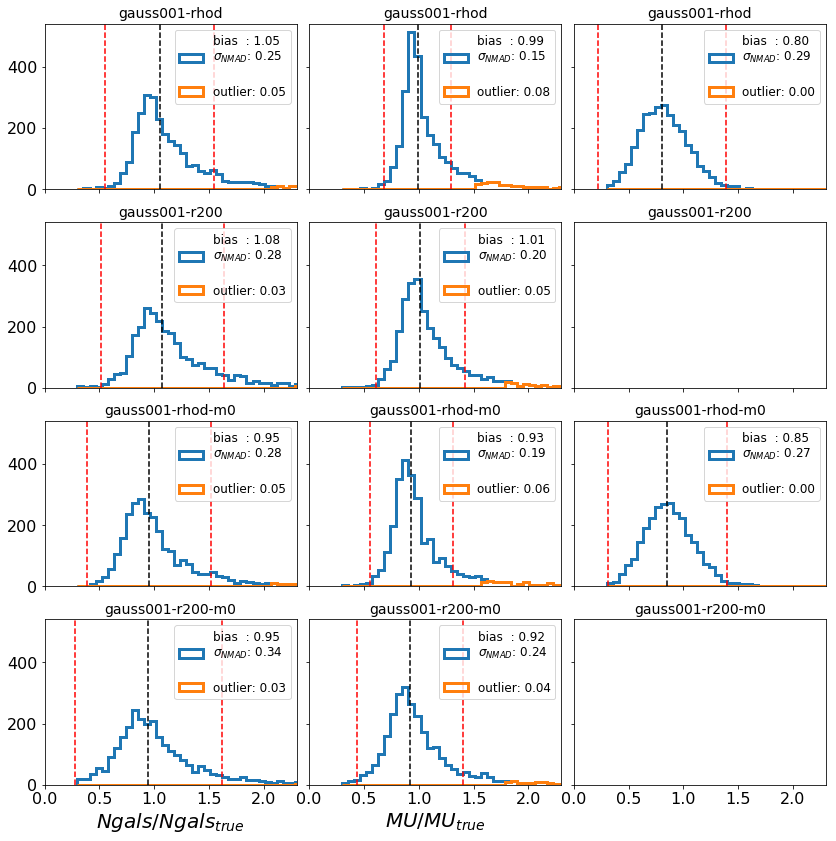

In [177]:
fig, axs = plt.subplots(nruns, 3, sharey='all',sharex='all', figsize=(14,(3.5)*nruns))
fig.subplots_adjust(hspace=0.20,wspace=0.05)

axs = axs.T
for j in range(3):
    for i in range(nruns):
        vc.plot_residual_distribution(runs[i],vc.predictors[j],axs=axs[j,i],log_residual=False,xlims=(0.3,3.))
        if i<(nruns-1):
            axs[j,i].set_xlabel('')
        
axs[0,0].set_xlim(0.,2.3)

Log Residual

(-0.4, 0.7)

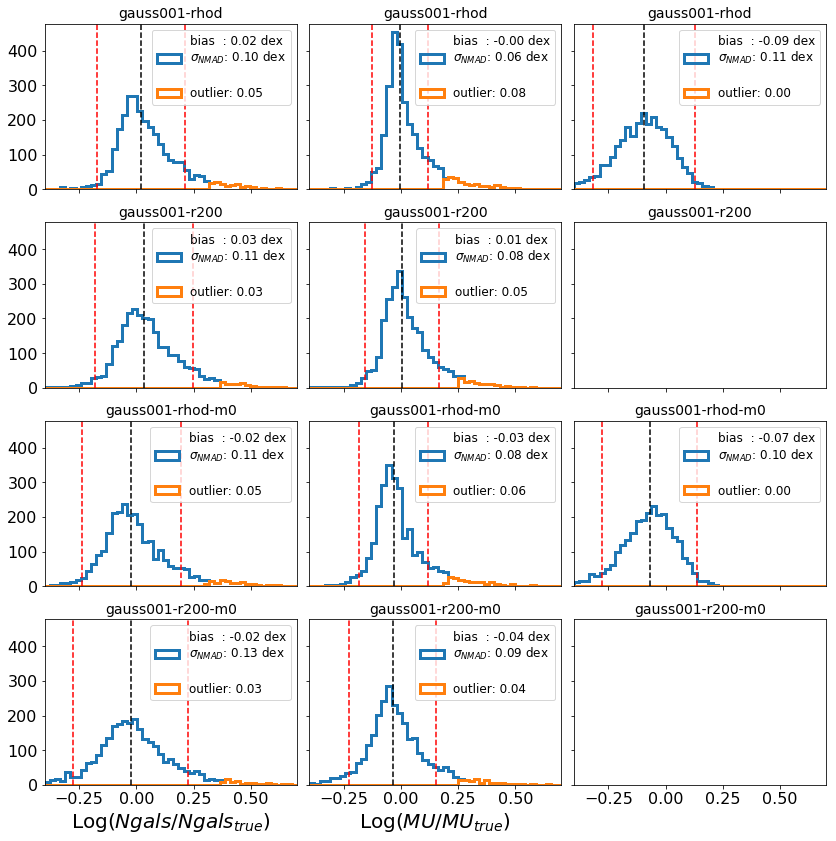

In [178]:
fig, axs = plt.subplots(nruns, 3, sharey='all',sharex='all', figsize=(14,(3.5)*nruns))
fig.subplots_adjust(hspace=0.20,wspace=0.05)

axs = axs.T
for j in range(3):
    for i in range(nruns):
        vc.plot_residual_distribution(runs[i],vc.predictors[j],axs=axs[j,i],log_residual=True,xlims=(-0.4,0.7))
        if i<(nruns-1):
            axs[j,i].set_xlabel('')
        
axs[0,0].set_xlim(-0.4,0.7)

### Binned Analysis

In [179]:
myperc = np.array([1.,15,30,45,60,75,90,95,97.5,100])
# myperc = np.array([1.,15,45,70,90,97.5,100])
mycols = ['Ngals_true','MU_TRUE','R200_true','redshift','M200_true']
mybins = []
for cols in mycols[:]:
    mybins.append(np.nanpercentile(vc.models[runs[0]]['aux_vars'][cols],myperc))

In [180]:
mybins[-2] = np.linspace(0.1,0.7,7)

In [181]:
vc.make_bins(runs,*mybins)
for run in runs:
    vc.compute_bin_statstics(run)
    vc.eval_all_metrics(run,binned=True)

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:311: RuntimeWarning: divide by zero encountered in log10
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:311: RuntimeWarning: invalid value encountered in log10


In [182]:
x = np.arange(len(runs))
colors = np.array([sns.color_palette()[xx] for xx in x])

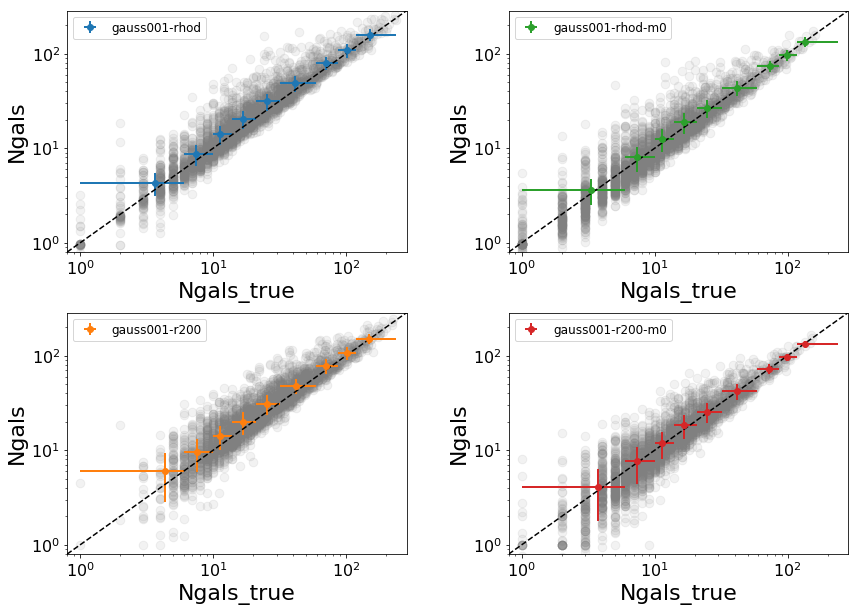

In [183]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))
fig.subplots_adjust(hspace=0.25,wspace=0.3)

axs = axs.flatten(order='F')

for i,co,run in zip(range(len(runs)),colors,runs):
    if i>3:
        break
    vc.plot_scaling_relation(vc.regressors[0],vc.predictors[0],run,points=True,axs=axs[i],color=co)


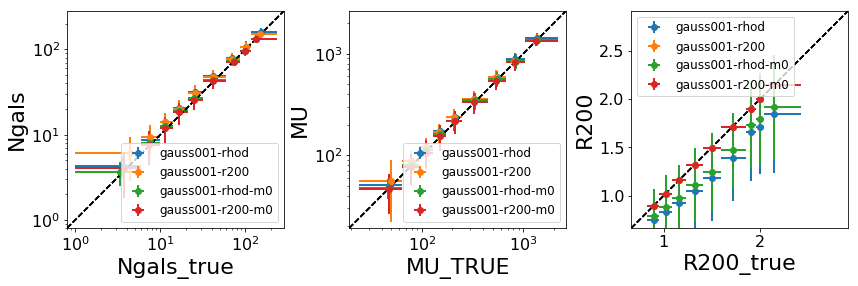

In [184]:
fig, axs = plt.subplots(1, 3, figsize=(14,4))
fig.subplots_adjust(hspace=0.25,wspace=0.3)

for co,run in zip(colors,runs):
    vc.plot_scaling_relation(vc.regressors[0],vc.predictors[0],run,points=False,axs=axs[0],color=co)
    vc.plot_scaling_relation(vc.regressors[1],vc.predictors[1],run,points=False,axs=axs[1],color=co)
    vc.plot_scaling_relation(vc.regressors[2],vc.predictors[2],run,points=False,axs=axs[2],color=co,log_scale=False)

### Binned Residuals

Our results for instance can be dependent on redshift, cluster mass or richness. In order to check, in this section we split the sample in bins of this quantities and we take a look into the residuals.

In [185]:
ycol='MU'
xcol='M200_true'

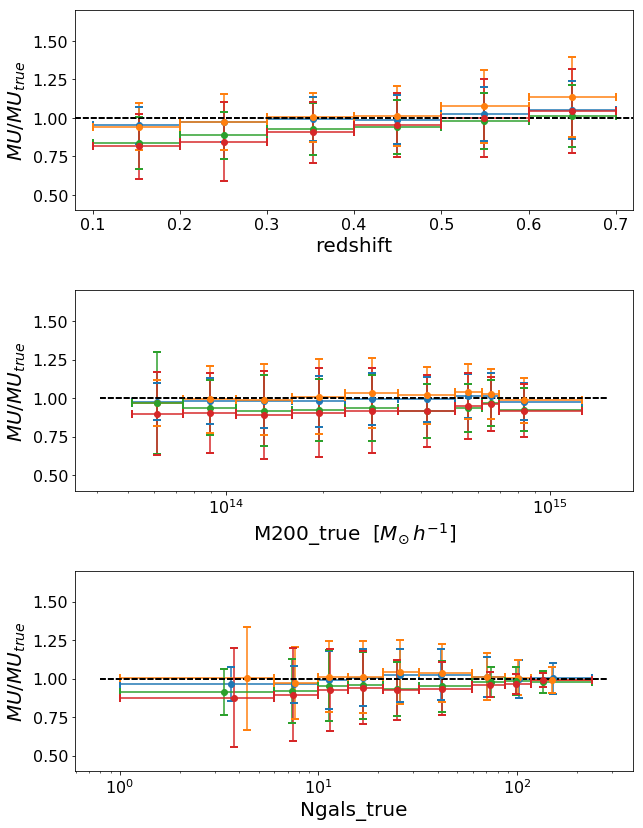

In [198]:
fig, axs = plt.subplots(3, 1, sharey='col', figsize=(10,14))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for co,run in zip(colors,runs):
    vc.plot_residual(run,'redshift',ycol,ax=axs[0],xlog=False,color=co,points=False)
    # vc.plot_residual(run2,'redshift',ycol,ax=axs[0],xlog=False,color='b',points=False,shift=0.01)
    vc.plot_residual(run,'M200_true',ycol,ax=axs[1],xlog=True,color=co,points=False,units=r'  [$M_{\odot}\, h^{-1}$]')
    vc.plot_residual(run,'Ngals_true',ycol,ax=axs[2],xlog=True,color=co,points=False)
    
axs[0].set_ylim(0.4,1.7)
axs[0].set_xlim(0.08,0.72)


axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].get_legend().remove()

In [200]:
ycol='Ngals'

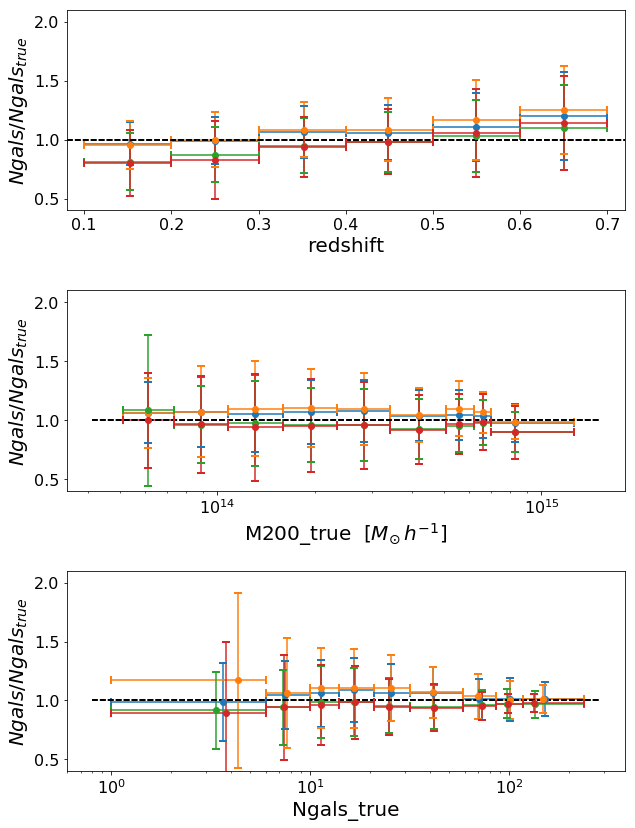

In [201]:
fig, axs = plt.subplots(3, 1, sharey='col', figsize=(10,14))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for co,run in zip(colors,runs):
    vc.plot_residual(run,'redshift',ycol,ax=axs[0],xlog=False,color=co,points=False)
    # vc.plot_residual(run2,'redshift',ycol,ax=axs[0],xlog=False,color='b',points=False,shift=0.01)
    vc.plot_residual(run,'M200_true',ycol,ax=axs[1],xlog=True,color=co,points=False,units=r'  [$M_{\odot}\, h^{-1}$]')
    vc.plot_residual(run,'Ngals_true',ycol,ax=axs[2],xlog=True,color=co,points=False)
    
axs[0].set_xlim(0.08,0.72)
axs[0].set_ylim(0.4,2.1)


axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].get_legend().remove()

In [202]:
ycol='R200'

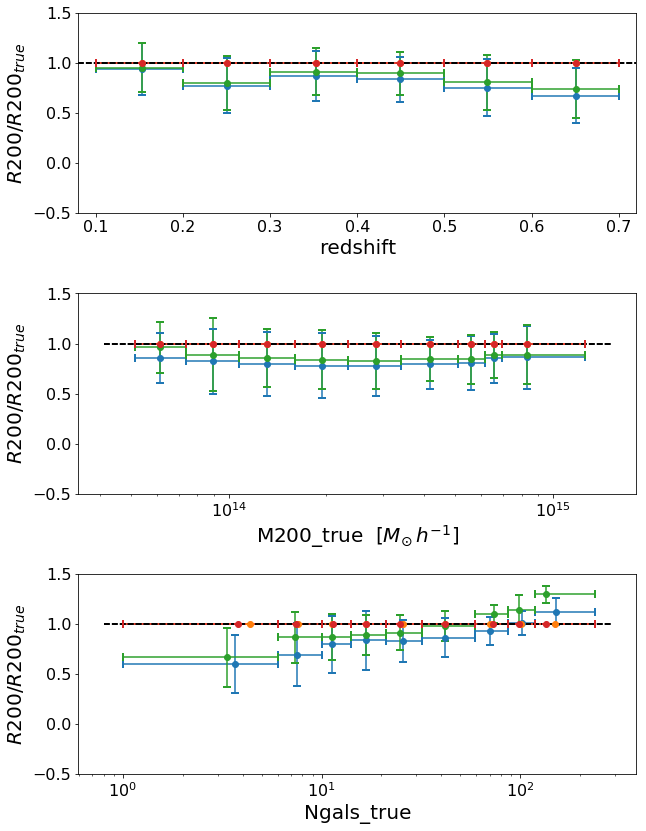

In [203]:
fig, axs = plt.subplots(3, 1, sharey='col', figsize=(10,14))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for co,run in zip(colors,runs):
    vc.plot_residual(run,'redshift',ycol,ax=axs[0],xlog=False,color=co,points=False)
    # vc.plot_residual(run2,'redshift',ycol,ax=axs[0],xlog=False,color='b',points=False,shift=0.01)
    vc.plot_residual(run,'M200_true',ycol,ax=axs[1],xlog=True,color=co,points=False,units=r'  [$M_{\odot}\, h^{-1}$]')
    vc.plot_residual(run,'Ngals_true',ycol,ax=axs[2],xlog=True,color=co,points=False)

axs[0].set_xlim(0.08,0.72)
axs[0].set_ylim(-0.5,1.5)

axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].get_legend().remove()

In [191]:
def plot_scatter_xvar(vc,xcol,ycol,runs,ax=None,metric='scatter_nmad'):
    if ax is None: ax=plt.axes()
    
    for run in runs:
        xmean,ymean,sigma,of,lower,upper = vc.get_residual_metrics_binned(run,xcol,ycol,metric=metric)
        ymin,ymax = np.mean(ymean-3*sigma),np.mean(ymean+3*sigma)
        xmin,xmax = 0.8*np.min(xmean-lower),1.2*np.max(xmean+upper)
        ylabel = r'$%s/%s_{true}$'%(ycol,ycol)
        ax.plot(xmean,sigma,'--',label=run)
        ax.scatter(xmean,sigma)

    ax.set_xlabel(xcol)
    ax.set_ylabel(metric)
    ax.legend()

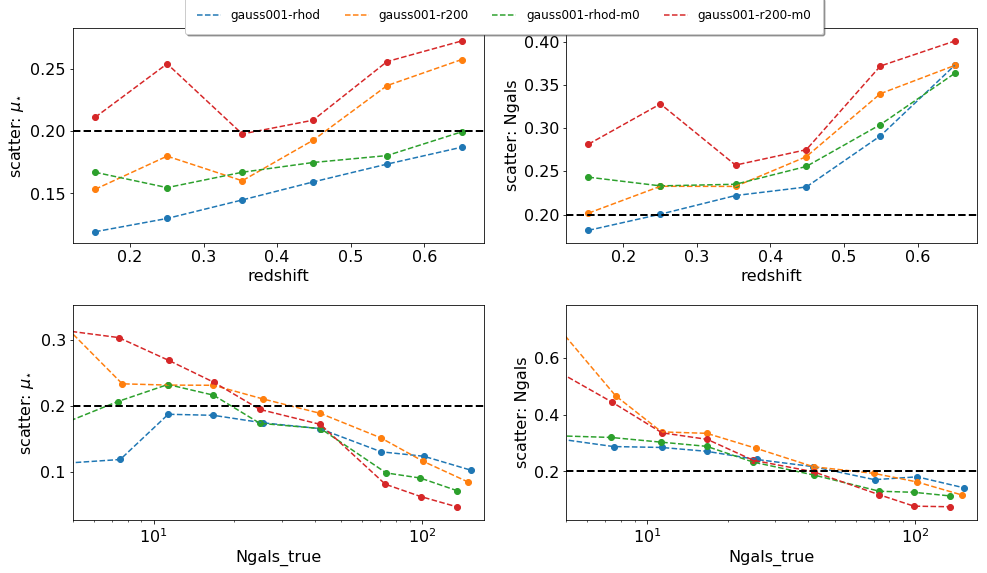

In [192]:
fig, axs = plt.subplots(2, 2, sharex='row',  figsize=(14,8))
fig.subplots_adjust(hspace=0.3,wspace=0.3)

plot_scatter_xvar(vc,'redshift','Ngals',runs,ax=axs[0,1])
fig.legend(fontsize=12,bbox_to_anchor=(.5, 1.), loc='upper center', shadow=True, borderaxespad=0.,ncol=len(runs),borderpad=1)
plot_scatter_xvar(vc,'redshift','MU',runs,ax=axs[0,0])
axs[0,0].axhline(0.2,ls='--',color='k',lw='2')
axs[0,1].axhline(0.2,ls='--',color='k',lw='2')

plot_scatter_xvar(vc,'Ngals_true','Ngals',runs,ax=axs[1,1])
plot_scatter_xvar(vc,'Ngals_true','MU',runs,ax=axs[1,0])
axs[1,0].axhline(0.2,ls='--',color='k',lw='2')
axs[1,1].axhline(0.2,ls='--',color='k',lw='2')
axs[1,0].set_xscale('log')
axs[1,1].set_xscale('log')

axs[0,0].get_legend().remove()
axs[0,1].get_legend().remove()
axs[1,0].get_legend().remove()
axs[1,1].get_legend().remove()

for i in range(2):
    axs[i,0].set_ylabel('scatter: %s'%('$\mu_{\star}$'))
    axs[i,1].set_ylabel('scatter: %s'%('Ngals'))

    axs[1,i].set_xlim(5,170)
# axs[0].set_title(ycol,fontsize=22)
fig.tight_layout()

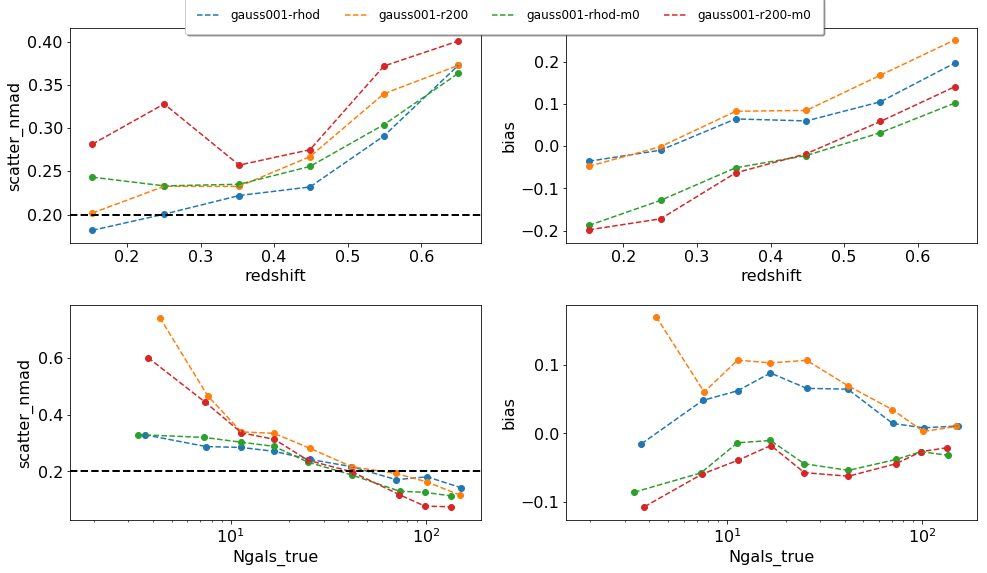

In [193]:
ycol = 'Ngals'

fig, axs = plt.subplots(2, 2, sharex='row',  figsize=(14,8))
fig.subplots_adjust(hspace=0.3,wspace=0.3)

plot_scatter_xvar(vc,'redshift',ycol,runs,ax=axs[0,1],metric='bias')
fig.legend(fontsize=12,bbox_to_anchor=(.5, 1.), loc='upper center', shadow=True, borderaxespad=0.,ncol=len(runs),borderpad=1)
plot_scatter_xvar(vc,'redshift',ycol,runs,ax=axs[0,0])
axs[0,0].axhline(0.2,ls='--',color='k',lw='2')

plot_scatter_xvar(vc,'Ngals_true',ycol,runs,ax=axs[1,1],metric='bias')
plot_scatter_xvar(vc,'Ngals_true',ycol,runs,ax=axs[1,0])
axs[1,0].axhline(0.2,ls='--',color='k',lw='2')
axs[1,0].set_xscale('log')
axs[1,1].set_xscale('log')

axs[0,0].get_legend().remove()
axs[0,1].get_legend().remove()
axs[1,0].get_legend().remove()
axs[1,1].get_legend().remove()


# axs[0].set_title(ycol,fontsize=22)
fig.tight_layout()

Text(0.5,1,'MU')

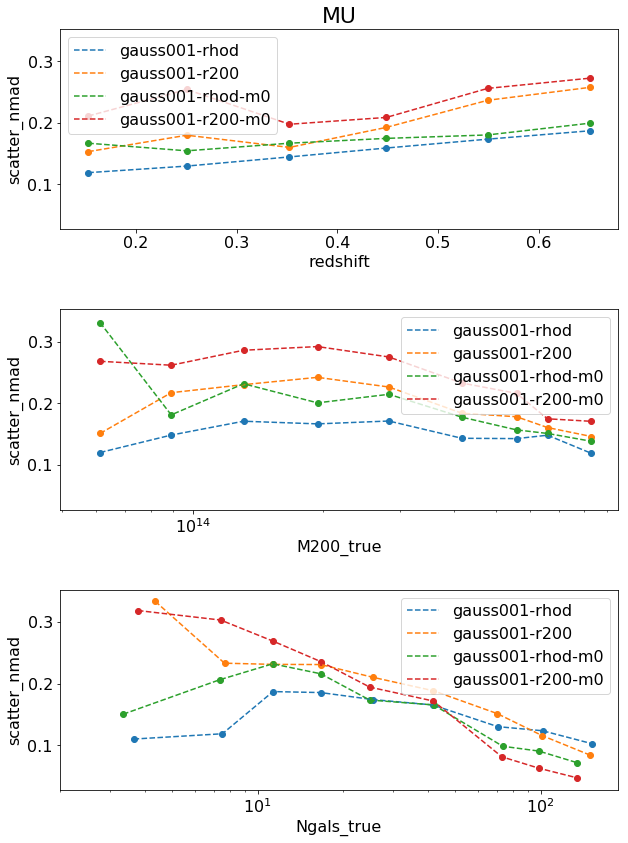

In [194]:
mycols = ['redshift','M200_true','Ngals_true']
ycol = 'MU'

fig, axs = plt.subplots(3, 1, sharey='col', figsize=(10,14))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i,xcol in enumerate(mycols):
    plot_scatter_xvar(vc,xcol,ycol,runs[:],ax=axs[i])
    if i>0: axs[i].set_xscale('log')
    
axs[0].set_title(ycol,fontsize=22)

Text(0.5,1,'Ngals')

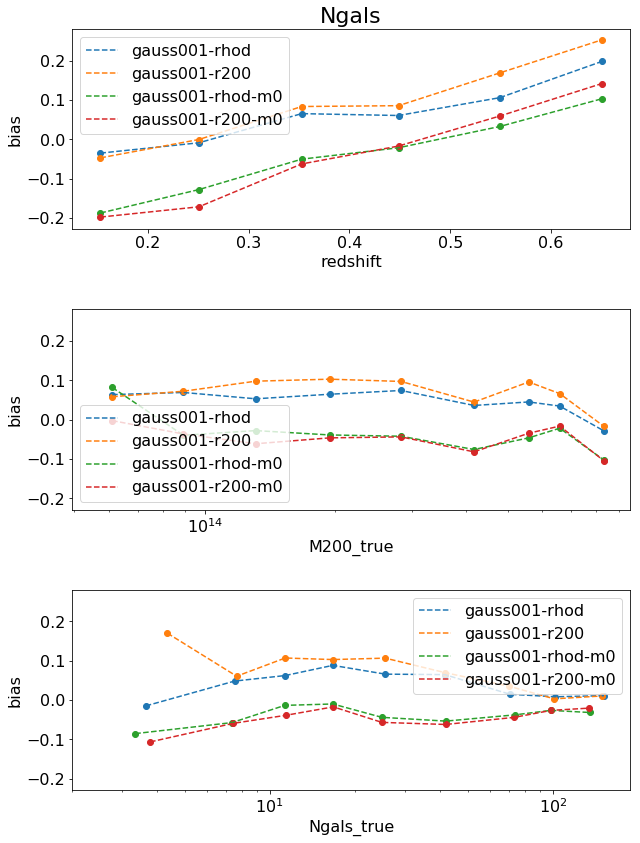

In [195]:
mycols = ['redshift','M200_true','Ngals_true']
ycol = 'Ngals'

fig, axs = plt.subplots(3, 1, sharey='col', figsize=(10,14))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i,xcol in enumerate(mycols):
    plot_scatter_xvar(vc,xcol,ycol,runs,ax=axs[i],metric='bias')
    if i>0: axs[i].set_xscale('log')

axs[0].set_title(ycol,fontsize=22)

Text(0.5,1,'MU')

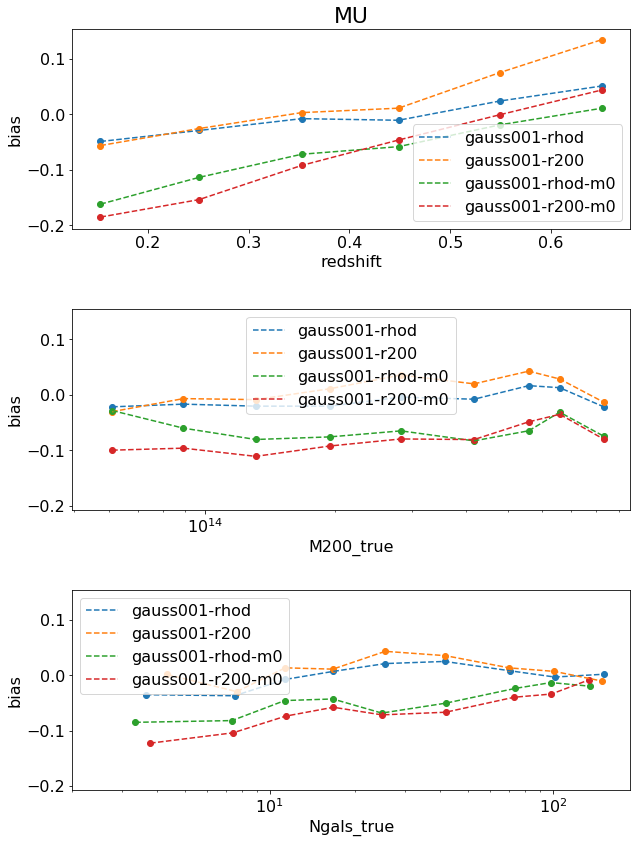

In [196]:
mycols = ['redshift','M200_true','Ngals_true']
ycol = 'MU'

fig, axs = plt.subplots(3, 1, sharey='col', figsize=(10,14))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i,xcol in enumerate(mycols):
    plot_scatter_xvar(vc,xcol,ycol,runs,ax=axs[i],metric='bias')
    if i>0: axs[i].set_xscale('log')
        
axs[0].set_title(ycol,fontsize=22)

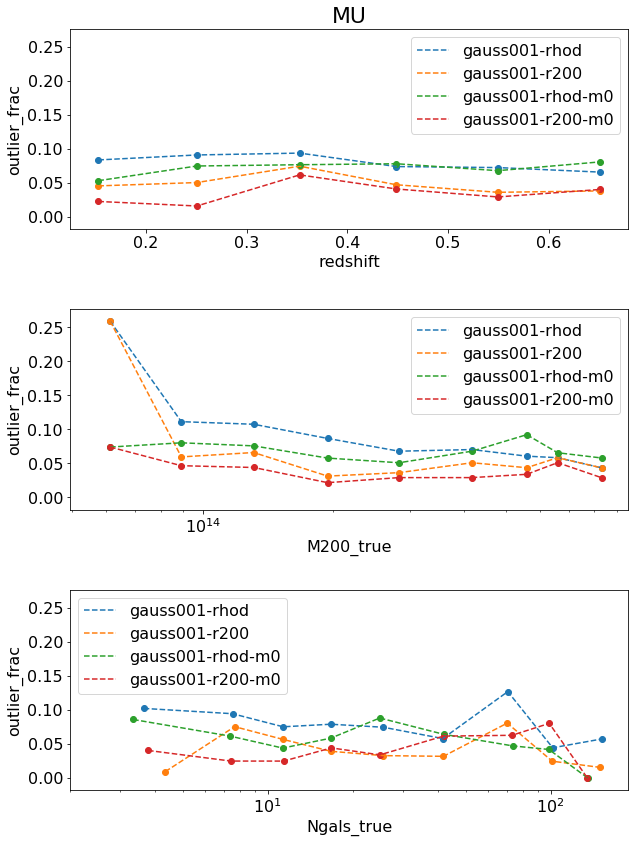

In [197]:
mycols = ['redshift','M200_true','Ngals_true']
ycol = 'MU'

fig, axs = plt.subplots(3, 1, sharey='col', figsize=(10,14))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

axs[0].set_title(ycol,fontsize=22)
for i,xcol in enumerate(mycols):
    plot_scatter_xvar(vc,xcol,ycol,runs,ax=axs[i],metric='outlier_frac')
    if i>0: axs[i].set_xscale('log')

In [99]:
import sys
sys.path.append("/home/s1/jesteves/git/ccopa/python/")

from main import copacabana

class viewClusters:
    def __init__(self,cfg='/home/s1/jesteves/git/ccopa/config_files/config_buzzard_v2.yaml',dataset='buzzard_v2'):
        self.copa = copacabana(cfg,dataset=dataset)

        self.models  = defaultdict(dict)
        self.metrics = defaultdict(dict)

        self.predictors = ['Ngals','MU','R200']
        self.regressors = ['Ngals_true','MU_TRUE','R200_true']
        self.aux_vars   = ['Ngals_true','MU_TRUE','R200_true','redshift','M200_true']
        
        self.npredictors = len(self.predictors)
        self.nauxialiars = len(self.aux_vars)
        
        self.metric_funcs = {"bias": bias_log_res,
                             "scatter_stdev": fractional_error_stdev,
                             "scatter_percentile": fractional_error_percentile,
                             "scatter_nmad": get_sigmaNMAD,
                             "outlier_frac": get_outlier_frac}
        pass

    def load_data(self,run_name):
        dat = self.copa.load_copa_out('cluster',run_name)
        cat = dat[(dat['redshift']<=0.7)&(dat['Ngals_true']>0.)].copy()
        #self.df  = cat.to_pandas()
        
        self.models[run_name]['predictors'] = np.array(cat[self.predictors])
        self.models[run_name]['regressors'] = np.array(cat[self.regressors])
        self.models[run_name]['aux_vars']   = np.array(cat[self.aux_vars])
        self.compute_residuals(run_name)
    
    def compute_resiudal_all(self):
        runs = self.models.keys()
        for run_name in runs:
            self.compute_residuals(run_name)
            
    def compute_residuals(self,run_name):
        self.models[run_name]['residual']     = np.full_like(self.models[run_name]['predictors'],-99.)
        self.models[run_name]['log_residual'] = np.full_like(self.models[run_name]['predictors'],-99.)

        for colx,coly in zip(self.regressors,self.predictors):
            x = self.models[run_name]['regressors'][colx]
            y = self.models[run_name]['predictors'][coly]
            res, log_res = get_frac_residual(x,y)
            self.models[run_name]['residual'][coly] = res
            self.models[run_name]['log_residual'][coly] = log_res

    def make_bins(self, runs, ngals_bins, mu_star_bins, r200_bins, zcls_bins, mass_bins):
        mybins             = [ngals_bins, mu_star_bins, r200_bins, zcls_bins, mass_bins]
        self.metrics['bins']= dict()
        for jj,xbin in zip(self.aux_vars,mybins):
            self.metrics['bins'][jj]  = xbin
            self.metrics['nbins'][jj] = xbin.size - 1
        
        for run_name in runs:
            labels,values = self._make_bins(mybins,run_name)
            self.models[run_name]['bins_idx'] = labels
            self.models[run_name]['bins_val'] = values
        
    def _make_bins(self,bins,run_name):
        labels = np.full_like(self.models[run_name]['aux_vars'],-99.)
        values = np.full_like(self.models[run_name]['aux_vars'],-99.)
        for xbin,col in zip(bins,self.aux_vars):
            x = self.models[run_name]['aux_vars'][col]
            keys,xbins = get_bins(x,xbin)
            labels[col]= keys
            values[col]= xbins
        return labels,values

    ### compute metrics
    def compute_bin_statstics(self,run_name):
        ## out: dict('xbins','xmean','nobjs')
        for jj in self.aux_vars:
            id_bins = self.models[run_name]['bins_idx'][jj].astype(np.int)    
            xs_vals = self.models[run_name]['aux_vars'][jj]
            ys_true = self.models[run_name]['predictors']
            res     = self.models[run_name]['residual']
                
            nbins    = self.metrics['nbins'][jj]
            xbins    = self.metrics['bins'][jj]
            
            indices  = np.arange(nbins,dtype=np.int)
            xmean    = get_binned_mean(xs_vals,xs_vals,xbins)#0.5*(xbins[1:]+xbins[:-1])
            nobjs    = np.histogram(xs_vals,bins=xbins)[0]
            
            ymean       = np.full_like(ys_true,np.nan)[:nbins]
            resmean     = ymean.copy()
            
            for ii in self.predictors:
                ymean[ii]     = get_binned_mean(xs_vals,ys_true[ii],xbins)
                resmean[ii]   = get_binned_mean(xs_vals,res[ii],xbins)
                
            mydict   = {'bins':indices,'xbins':xbins,'xmean':xmean,'ymean':ymean,'res_mean':resmean,
                        'nobjs':nobjs}            
            self.metrics[run_name][jj] = mydict
    
    def eval_metrics(self,run_name,metric):
        ys_predict = self.models[run_name]['predictors']
        ys_true    = self.models[run_name]['regressors']
        
        dtypes      = [(col,'<f8') for col in self.predictors]
        scores      = np.full((1,),-99.,dtype=dtypes)
        for ii,kk in zip(self.predictors,self.regressors):
            scores[ii]  = self.metric_funcs[metric](ys_true[kk],ys_predict[ii])
        self.metrics[run_name][metric] = scores
    
    def eval_all_metrics(self,run_name,binned=False):
        ### func can be: eval_metrics_bin, eval_metrics
        metrics= self.metric_funcs.keys()
        if not binned:
            for metric in metrics:
                self.eval_metrics(run_name, metric)
        else:
            for metric in metrics: 
                self.eval_metrics_bin(run_name, metric)

    def eval_metrics_bin(self, run_name, metric):
        #error_message = f"{run_name} not yet trained"
        #assert run_name in self.models, error_message

        ys_predict = self.models[run_name]['predictors']
        ys_true    = self.models[run_name]['regressors']
        xs_vals    = self.models[run_name]['aux_vars']
        
        for jj in self.aux_vars:
            xbins   = self.metrics[run_name][jj]['xbins']
            dtypes      = [(col,'<f8') for col in self.predictors]
            scores      = np.full_like(xbins[1:],-99.,dtype=dtypes)
            for ii,kk in zip(self.predictors,self.regressors):
                scores[ii]  = self.metrics_bin(metric, ys_true[kk],ys_predict[ii], xs_vals[jj], xbins)
            self.metrics[run_name][jj][metric] = scores

    def metrics_bin(self,metric,ytrue,ypred,xvar,xbins):
        error_message = ('{} not recognized! options are: {}'
                         ''.format(metric, self.metric_funcs.keys()))
        assert metric in self.metric_funcs, error_message
        
        keys     = get_bins_group_indices(xvar,xbins)
        ytrue_bin= group_by(ytrue,keys)#get_bins_group(x,ytrue,xbins)
        ypred_bin= group_by(ypred,keys)#get_bins_group(x,ypred,xbins)#[ypred[idx] for idx in keys]
        
        nbins    = len(xbins)-1
        scores   = np.full_like(xbins[:-1],-99.,dtype=np.float64)
        
        for i,yt,yp in zip(range(nbins),ytrue_bin,ypred_bin):
            scores[i] = self.metric_funcs[metric](yt,yp)
        return scores

    def show_metrics_table_all(self,run):
        metrics= self.metric_funcs.keys()
        mydict = dict.fromkeys(metrics)
        for ycol in self.predictors:
            for col in metrics:
                mydict[col] = np.append(mydict[col],self.metrics[run][col][ycol])
        df = pd.DataFrame(mydict,index=[None]+self.predictors)[1:]
        #df.set_index('index')
        return df
            
    def get_residual_metrics(self,run,ycol,log_residual=False):
        bias = self.metrics[run]['bias'][ycol]+1
        sigma= self.metrics[run]['scatter_percentile'][ycol]
        sigma_nmad = self.metrics[run]['scatter_nmad'][ycol]
        of   = self.metrics[run]['outlier_frac'][ycol]

        if log_residual:
            bias,sigma = np.log10(bias), np.log10(sigma+1)
            sigma_nmad = np.log10(sigma_nmad+1)
        return bias,sigma,sigma_nmad,of
    
    def get_residual_metrics_binned(self,run,xcol,ycol,log_residual=False,metric='scatter_nmad'):
        xbins = self.metrics[run][xcol]['xbins']
        xmean = self.metrics[run][xcol]['xmean']
        bias  = self.metrics[run][xcol]['bias'][ycol]+1
        sigma = self.metrics[run][xcol][metric][ycol]
        of    = self.metrics[run][xcol]['outlier_frac'][ycol]
        
        lower  = xmean-xbins[:-1]
        upper  = xbins[1:]-xmean
        return xmean,bias,sigma,of,lower,upper
        
    def plot_residual_distribution(self,run,ycol,axs=None,xlims=None,log_residual=False):
        if axs is None: axs=plt.axes()
        residual    = filter_nan_inf(self.models[run]['residual'][ycol])
        log_res     = filter_nan_inf(self.models[run]['log_residual'][ycol])
        mask        = get_oulier_mask(log_res)

        xlabel   = r'$%s/%s_{true}$'%(ycol,ycol)
        units    = '\n'
        if log_residual:
            residual = log_res
            xlabel   = r'Log(%s)'%xlabel
            units    = 'dex\n'

        bias,sigma,sigma_nmad,of = self.get_residual_metrics(run,ycol,log_residual=log_residual)
        xmin,xmax   = np.nanpercentile(residual[residual>-99],[0,100])
        xlo,xup     = bias-2*sigma_nmad, bias+2*sigma_nmad

        if xlims is not None:
            xmin,xmax = xlims

        l1 = r'bias  : %.2f %s$\sigma_{NMAD}$: %.2f %s'%(bias,units,sigma_nmad,units)
        l2 = r'outlier: %.2f'%(of)
        
        if sigma_nmad>0.01:
            xbins = np.linspace(xmin,xmax,50)
            _ = axs.hist(residual,bins=xbins,label=l1,histtype='step',lw=3)
            _ = axs.hist(residual[mask],bins=xbins,label=l2,histtype='step',lw=3)
            axs.axvline(bias,color='k',ls='--')
            axs.axvline(xup,color='r',ls='--')
            axs.axvline(xlo,color='r',ls='--')

            #plt.yscale('log')
            axs.set_xlabel(xlabel,fontsize=20)
            axs.legend(fontsize=12)
        axs.set_title(run,fontsize=14)
        
    def get_binned_variables(self,xcol,ycol,run,metric='scatter_nmad'):
        ## get variables
        x = self.models[run]['regressors'][xcol]
        y = self.models[run]['predictors'][ycol]
        
        xbins = self.metrics[run][xcol]['xbins']
        xb= self.metrics[run][xcol]['xmean']#0.5*(xbins[1:]+xbins[:-1])#self.metrics[run][xcol]['xmean']
        yb= self.metrics[run][xcol]['ymean'][ycol]
        
        lower,upper = xb-xbins[:-1],xbins[1:]-xb
        
        yb_err= self.metrics[run][xcol][metric][ycol]
        xb_err= [lower,upper]
        
        xmin,xmax = 0.8*(np.nanmin(xbins)), 1.2*(np.nanmax(xbins))
        xlims = (xmin,xmax)
        
        mask  = np.logical_not(np.isnan(x)|np.isnan(y))
        x = x[mask]
        y = y[mask]
        return x,y,xb,yb,xb_err,yb_err*xb,xlims
        
    def plot_scaling_relation(self,xcol,ycol,run,color='r',axs=None,xlims=None,points=False,metric='scatter_nmad',fit=False,title='',log_scale=True):
        ## get variables
        x,y,xb,yb,xb_err,yb_err,xlims0 = self.get_binned_variables(xcol,ycol,run,metric=metric)
        if xlims is None: xlims=xlims0
        _plot_scaling_relation(x,y,xb,yb,xb_err,yb_err,xlims,xcol,ycol,li=run,points=points,axs=axs,fit=fit,title=title,log_scale=log_scale,color=color)
    
    def plot_residual(self,run,xcol,ycol,ax=None,xlog=False,color='r',points=True,units='',shift=0.):
        if ax is None: ax = plt.axes()
        xmean,ymean,sigma,of,lower,upper = self.get_residual_metrics_binned(run,xcol,ycol,log_residual=False)
        ymin,ymax = np.nanmean(ymean-3*sigma),np.nanmean(ymean+3*sigma)
        xmin,xmax = 0.8*np.nanmin(xmean-lower),1.2*np.nanmax(xmean+upper)
        ylabel = r'$%s/%s_{true}$'%(ycol,ycol)

        if points:
            x  = self.models[run]['aux_vars'][xcol]
            res= self.models[run]['residual'][ycol]
            ax.scatter(x,res,color=color,alpha=0.3,s=40)

        ax.plot([xmin,xmax],[1.,1.],'k--')
        ax.errorbar(shift+xmean,ymean,xerr=[lower,upper],yerr=sigma,color=color, fmt='o', capsize=4, capthick=2,label=run)
        ax.set_ylim(ymin,ymax)
        ax.set_xlabel(xcol+units,fontsize=20)
        ax.set_ylabel(ylabel,fontsize=20)
        ax.legend()
        if xlog:
            ax.set_xscale('log')

def group_by(x,keys):
    return [x[idx] for idx in keys]

def get_bins_group_indices(x,bins):
    idx  = np.argsort(x)
    ## to avoid the boundary condition of the digitize function as xlow <= x < xup
    mybins = bins.copy()
    mybins[-1] += 0.1
    inds = np.digitize(x,mybins)
    return np.split(idx, np.unique(inds[idx], return_index=True)[1][1:])
    
def get_bins_group(x,y,bins):
    idx  = np.argsort(x)
    ## to avoid the boundary condition of the digitize function as xlow <= x < xup
    mybins = bins.copy()
    mybins[-1] += 0.1
    inds = np.digitize(x,mybins)
    return np.split(y[idx], np.unique(inds[idx], return_index=True)[1][1:])
    
def get_binned_mean(x,y,bins):
    y     = filter_nan_inf(y)
    y     = np.where(y==-99,0.,y)
    x     = filter_nan_inf(x)
    sum_y = np.histogram(x, bins, weights=y)[0]
    nobjs = np.histogram(x, bins)[0]
    return sum_y/nobjs
    
def get_bins(variable,xedges):
    nbins   = len(xedges)-1
    indices = np.full_like(variable,-99,dtype=np.int)
    xbins   = np.full_like(variable,-99,dtype=np.float)

    means = (xedges[1:]+xedges[:-1])/2.
    for i in range(nbins):
        idx = np.where((variable >= xedges[i]) & (variable <= xedges[i + 1]))[0]
        xbins[idx]   = means[i]
        indices[idx] = i
    return indices, xbins

def get_log(x):
    xlog = np.log10(x)
    xlog[np.isinf(xlog)] = -99
    xlog[np.isnan(xlog)] = -99
    return xlog

def get_frac_residual(x,y):
    res = y/(x+1e-6)
    log_res = get_log(res)
    return res,log_res

def mad(data, axis=None):
    return np.median(np.abs(data - np.median(data)))

def median_absolute_dev(x,y):
    res, log_res = get_frac_residual(x,y)
    return 10**mad(log_res[log_res>-99])

def bias_log_res(x,y):
    res, log_res = get_frac_residual(x,y)
    mask = log_res>-99.
    return 10**np.median(log_res[mask])-1.

def fractional_error_stdev(x, y):
    res, log_res = get_frac_residual(x,y)
    score = np.std(log_res[log_res>-99])
    return 10**score-1.

def fractional_error_percentile(x, y):
    res, log_res = get_frac_residual(x,y)
    mask = log_res>-99.
    if np.count_nonzero(mask)>2:
        p16 = np.percentile(log_res[mask], 16)
        p84 = np.percentile(log_res[mask], 84)
        score = 0.5*(p84-p16)
    else:
        score = -99
    return 10**score-1.

def get_sigmaNMAD(x,y):
    sigmaNMAD = 1.4*(median_absolute_dev(x,y)-1.)
    return sigmaNMAD

def get_outlier_frac(x,y):
    res, log_res = get_frac_residual(x,y)
    sigmaNMAD = 1.4*mad(log_res[log_res>-99])
    bias      = np.nanmedian(log_res[log_res>-99])
    out       = np.where(np.abs((log_res-bias)>=3.*sigmaNMAD))[0]
    frac      = 1.*out.size/x.size
    return frac

def get_oulier_mask(log_res):
    sigmaNMAD = 1.4*mad(log_res[log_res>-99])
    bias      = np.nanmedian(log_res[log_res>-99])
    out       = np.where(np.abs((log_res-bias)>=3.*sigmaNMAD))[0]
    return out
    
def r2_score(x,y):
    """ returns non-aggregate version of r2 score.

    based on r2_score() function from sklearn (http://sklearn.org)
    """
    res, log_res = get_frac_residual(x,y)
    mask = log_res>-99.
    return sklearn.metrics.r2_score(x[mask],y[mask]) 

def filter_nan_inf(x):
    mask = np.isinf(x)|np.isnan(x)
    x[mask] = -99.
    return x

In [52]:
def _plot_scaling_relation(x,y,xb,yb,xb_err,yb_err,xlims,xcol,ycol,li='_',color='b',points=False,axs=None,fit=False,title='',log_scale=True):
    if axs is None: axs = plt.axes()
    
    ## linear fit
    linreg=lin_reg(x,y)
    
    idx = np.argsort(x)
    xt,yh = x[idx],linreg['Yhat'][idx]

    b0 = round(linreg['b0'],3)
    b1 = round(linreg['b1'],3)
    cb_u, cb_l = linreg['cb_u'], linreg['cb_l']
    
    ## Plot
    if fit:
        axs.plot(xt,yh, color="r",label='y=%.2f+%.2fx'%(b0,b1))
        axs.fill_between(xt, cb_l, cb_u, color="gray", alpha=0.25, label='_nolabel_')
        axs.plot(xt,cb_l, color="r", label='_nolabel_')
        axs.plot(xt,cb_u, color="r", label='_nolabel_')

    if points:
        sc = axs.scatter(x,y,s=75, alpha=0.1, color='gray')

    axs.errorbar(xb,yb,xerr=xb_err,yerr=yb_err,color=color,linewidth=2.,fmt='o',label=li)
    axs.plot(np.linspace(xlims[0],xlims[1]),np.linspace(xlims[0],xlims[1]),linestyle='--',color='k')
    
    if log_scale:
        xlims = np.where(xlims<1.,2.,xlims)
        axs.set_xscale('log')
        axs.set_yscale('log')
    
    axs.set_ylim(xlims)
    axs.set_xlim(xlims)
    
    axs.set_xlabel(xcol,fontsize=22)
    axs.set_ylabel(ycol,fontsize=22)
    axs.legend(fontsize=12)
    
    #axs.set_title(run,fontsize=22)
    #fig.tight_layout()
def lin_reg(X,Y):
    barX=np.mean(X); barY=np.mean(Y)
    XminusbarX=X-barX; YminusbarY=Y-barY
    b1=sum(XminusbarX*YminusbarY)/sum(XminusbarX**2)
    b0=barY-b1*barX
    Yhat=b0+b1*X
    e_i=Y-Yhat
    sse=np.sum(e_i**2)
    ssr=np.sum((Yhat-barY )**2)
    n=len(X)
    MSE=sse/np.float(n-2)

    s_of_yh_hat=np.sqrt(MSE*(1.0/n+(X-barX)**2/sum(XminusbarX**2)))
    W=np.sqrt(2.0*st.f.ppf(0.95,2,n-2))

    cb_upper=Yhat+W*s_of_yh_hat
    cb_lower=Yhat-W*s_of_yh_hat
    idx=np.argsort(X)

    return {'Yhat':Yhat,'b0':b0,'b1':b1,'cb_u':cb_upper[idx], 'cb_l': cb_lower[idx]}

    

In [53]:
import seaborn as sns

def get_dataFrame_residual(vc,runs):
    out = []
    for run in runs:
        df = pd.DataFrame(columns=['runs']+vc.predictors)
        for col in vc.predictors:
            res = vc.models[run]['residual'][col]
            df[col] = res
        df['runs']     = np.repeat(run,len(res))
        out.append(df)
    odf = pd.concat(out)
    return odf

def box_plot(planets,ycol,ax=None,xlims=(0.,2.6)):
    #f, ax = plt.subplots(figsize=(7, 6))
    
    # Plot the orbital period with horizontal boxes
    sns.boxplot(x=ycol, y="runs", data=planets,
                whis=[4, 96], width=.6, palette="husl",ax=ax)

    # Add in points to show each observation
    # sns.stripplot(x=ycol, y="runs", data=planets,
    #               size=2, color=".3", linewidth=0)

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set_xlim(xlims)
    ax.set(ylabel="")
    ax.set(xlabel='$%s/%s_{TRUE}$'%(ycol,ycol))
    #sns.despine(trim=True, left=True,ax=ax)